# Task 1 – Exploratory Data Analysis

In [ ]:
import sys
from pathlib import Path
BASE_DIR = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(BASE_DIR))         
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import (
    load_data,
    basic_info,
    numeric_summary,
    plot_histograms,
    plot_boxplots,
    correlation_heatmap,
)

pd.set_option("display.max_columns", None)

DATA_PATH = BASE_DIR / "data" / "MachineLearningRating_v3.txt"
df = load_data(DATA_PATH)

In [3]:
basic_info(df)

Rows: 1000098 	Columns: 52

Dtype counts:
 object            35
float64           11
int64              4
bool               1
datetime64[ns]     1
Name: count, dtype: int64

Top missing columns:
 NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
Rebuilt                     641901
Converted                   641901
WrittenOff                  641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
VehicleType                    552
make                           552
mmcode                         552
Model                          552
Cylinders                      552
bodytype                       552
kilowatts                      552
NumberOfDoors                  552
VehicleIntroDate               552
dtype: int64


In [4]:
num_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']
numeric_summary(df, num_cols)

,count,mean,std,min,25%,50%,75%,max
TotalPremium,1000098.0,61.905496,2.302845e+02,-782.576754,0.0,2.178333,21.929825,6.528260e+04
TotalClaims,1000098.0,64.861190,2.384075e+03,-12002.412281,0.0,0.000000,0.000000,3.930921e+05
SumInsured,1000098.0,604172.732589,1.508332e+06,0.010000,5000.0,7500.000000,250000.000000,1.263620e+07
CustomValueEstimate,220456.0,225531.129942,5.645157e+05,20000.000000,135000.0,220000.000000,280000.000000,2.655000e+07


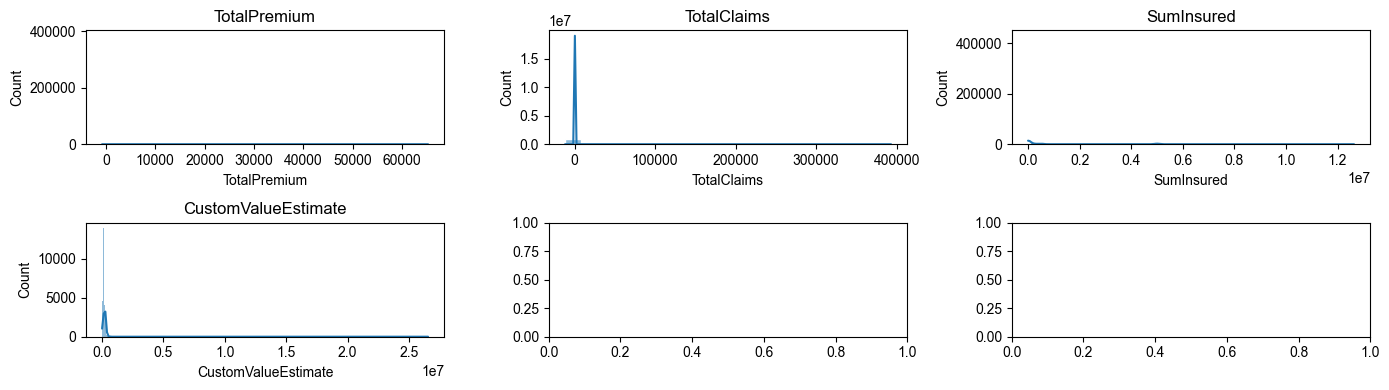

In [5]:
plot_histograms(df, num_cols)

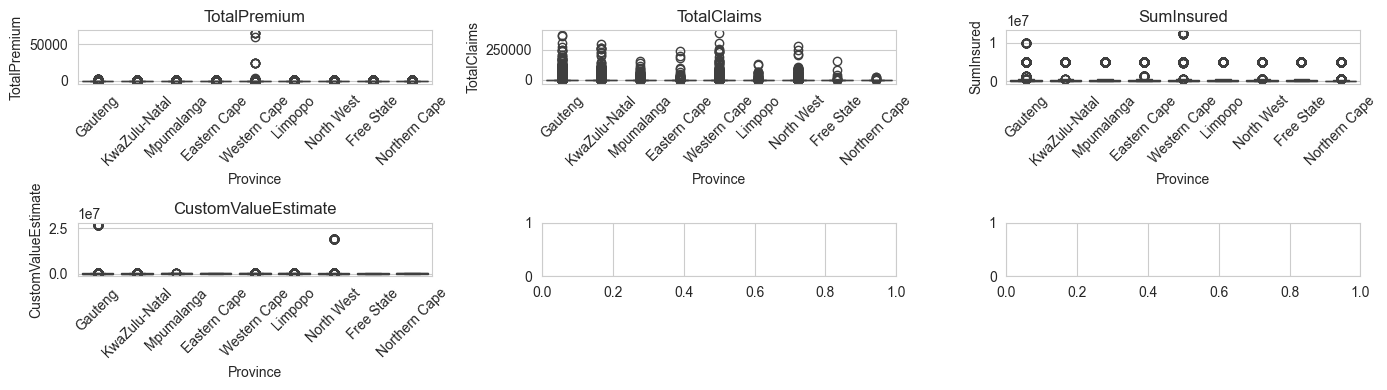

In [6]:
plot_boxplots(df, num_cols, group_col='Province')

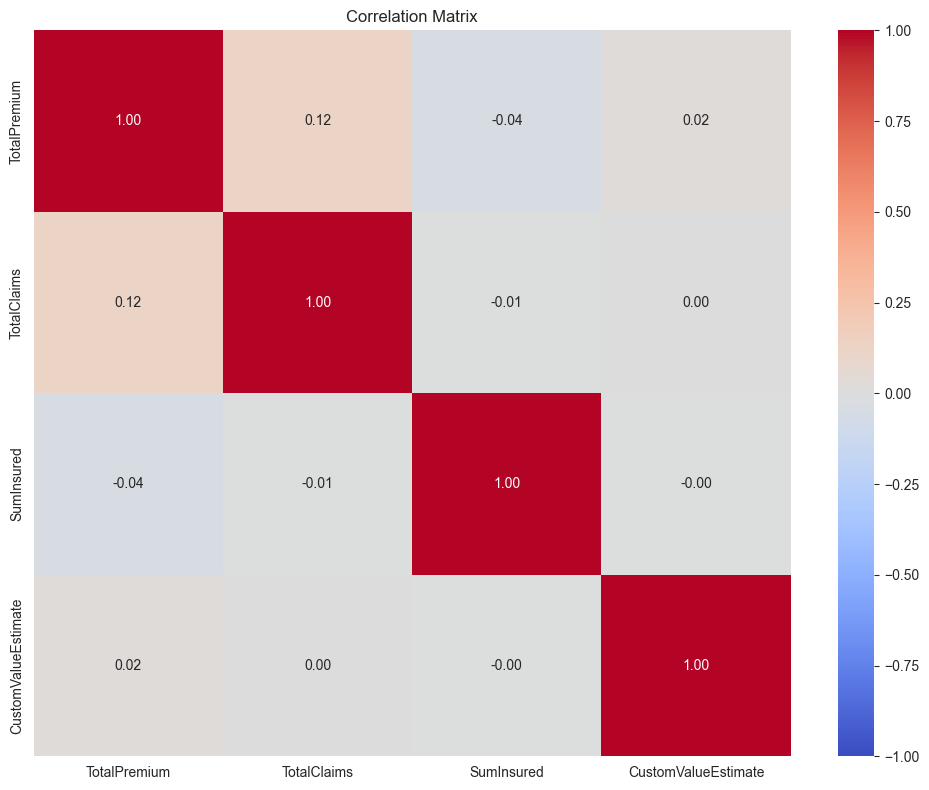

In [7]:
correlation_heatmap(df, num_cols)

In [8]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, pd.NA)
for col in ['Province', 'VehicleType', 'Gender']:
    display(df.groupby(col)['LossRatio'].mean().sort_values())

Province
Free State       0.106209
Northern Cape    0.203831
Eastern Cape     0.235589
KwaZulu-Natal    0.264746
North West       0.285348
Western Cape      0.34175
Limpopo          0.348712
Mpumalanga       0.392698
Gauteng          0.428889
Name: LossRatio, dtype: object

VehicleType
Bus                       0.0
Passenger Vehicle    0.337368
Medium Commercial    0.493356
Light Commercial     0.543917
Heavy Commercial     0.793617
Name: LossRatio, dtype: object

Gender
Not specified    0.347904
Male             0.348852
Female           0.491979
Name: LossRatio, dtype: object

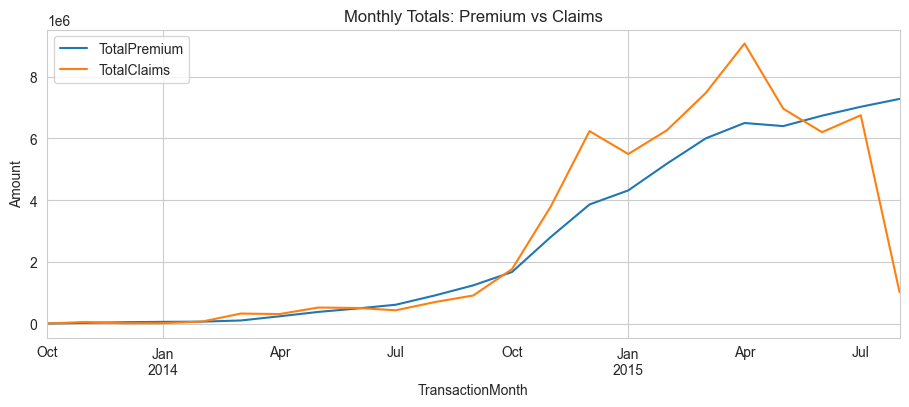

In [9]:
monthly = (
    df.dropna(subset=['TransactionMonth'])
      .groupby(df['TransactionMonth'].dt.to_period('M'))[['TotalPremium','TotalClaims']].sum()
)
monthly.index = monthly.index.to_timestamp()
monthly.plot(figsize=(11,4), title='Monthly Totals: Premium vs Claims')
plt.ylabel('Amount'); plt.show()